<a href="https://colab.research.google.com/github/tjohanne42/time_series_project_simplon/blob/main/preprocess_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# I. Load data

## a) read_csv

In [65]:
url = 'https://drive.google.com/file/d/14rWJ6OKc_aZbAcb6h220vQP0xfitLgHM/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, sep=";")

# df = pd.read_csv("energy_use_in_the_UK.csv", sep=";")

print(df.shape)
display(df.head())
display(df.info())

(796453, 6)


,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:01,8693,7121,2740,728,0.0
1,2012-01-01 00:05:06,8650,7120,2812,732,0.0
2,2012-01-01 00:10:01,8880,7125,2896,744,0.0
3,2012-01-01 00:15:01,9111,7122,2964,748,0.0
4,2012-01-01 00:20:01,9195,7114,2992,750,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796453 entries, 0 to 796452
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0    timestamp  796453 non-null  object 
 1    coal       796453 non-null  int64  
 2    nuclear    796453 non-null  int64  
 3    wind       796453 non-null  int64  
 4    hydro      796453 non-null  int64  
 5    solar      796453 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 36.5+ MB


None

## b) remove space in cols, timestamp to datetime

In [66]:
if df.columns[0][0] == " ":
  df = df.rename(columns=lambda x: x[1:])
df["timestamp"] = pd.to_datetime(df["timestamp"])

## c) plot values

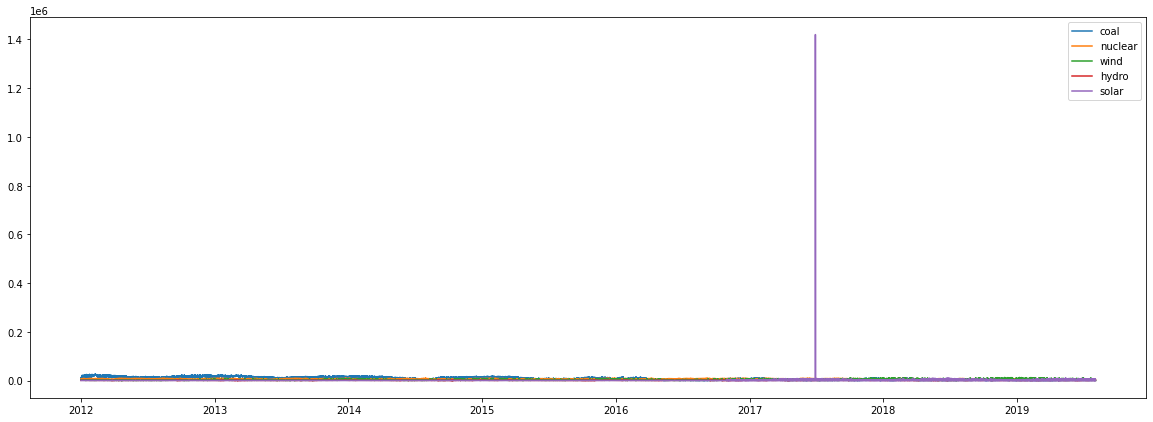

In [67]:
plt.figure(figsize=(20,7))
for col in df.columns[1:]:
    plt.plot(df["timestamp"], df[col], label=col)
plt.legend()
plt.show()

## d) remove solar outlayers

In [68]:
print(df["solar"].max())
idx = np.argmax(df["solar"])
print(idx)

1420000.0
576229


In [69]:
display(df.iloc[idx-2:idx+3])
df["solar"][576229] = np.nan
df["solar"][576230] = np.nan
df["solar"] = df["solar"].interpolate()
display(df.iloc[idx-2:idx+3])

,timestamp,coal,nuclear,wind,hydro,solar
576227,2017-06-29 15:25:32,1572,7946,4584,367,1570.0
576228,2017-06-29 15:30:31,1572,7946,4584,367,1570.0
576229,2017-06-29 15:35:32,1572,7946,4584,367,1420000.0
576230,2017-06-29 15:40:33,1572,7946,4584,367,1420000.0
576231,2017-06-29 15:45:33,1572,7946,4584,367,1450.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,coal,nuclear,wind,hydro,solar
576227,2017-06-29 15:25:32,1572,7946,4584,367,1570.0
576228,2017-06-29 15:30:31,1572,7946,4584,367,1570.0
576229,2017-06-29 15:35:32,1572,7946,4584,367,1530.0
576230,2017-06-29 15:40:33,1572,7946,4584,367,1490.0
576231,2017-06-29 15:45:33,1572,7946,4584,367,1450.0


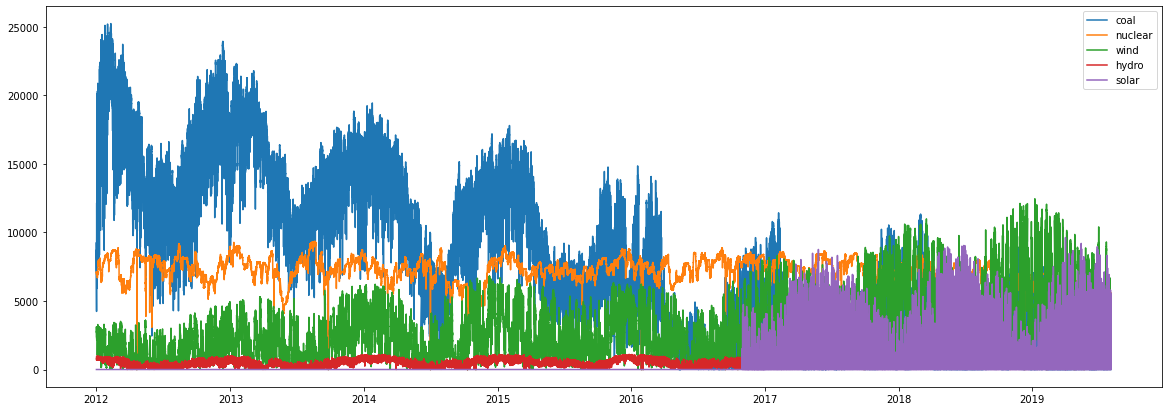

In [70]:
plt.figure(figsize=(20,7))
for col in df.columns[1:]:
    plt.plot(df["timestamp"], df[col], label=col)
plt.legend()
plt.show()

## g) groupby hour dataframe (mean)

show value_counts by hour

In [71]:
tmp = df.copy()

tmp = tmp.drop_duplicates().reset_index(drop=True)

date_col = "timestamp"

# hour
tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, x.day, x.hour, 0, 0))

ret = tmp.groupby([date_col], axis=0, as_index=False).count()
print(ret['coal'].value_counts())

12    66064
11      155
10       67
13       33
9        29
8        24
7        14
6        13
3         9
1         8
4         7
5         5
2         4
14        3
19        1
15        1
16        1
22        1
Name: coal, dtype: int64


As we don't have same numbers of values for each hour, we can't sum this values  
We're gonna calculate the mean of each value per hour

shape: (66439, 6)


,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:00,107545.0,84685.0,35915.0,8971.0,0.0
1,2012-01-01 01:00:00,103154.0,83313.0,35674.0,9108.0,0.0
2,2012-01-01 02:00:00,92415.0,83339.0,35211.0,8977.0,0.0
3,2012-01-01 03:00:00,74389.0,83337.0,35654.0,8952.0,0.0
4,2012-01-01 04:00:00,64333.0,84255.0,36024.0,8940.0,0.0


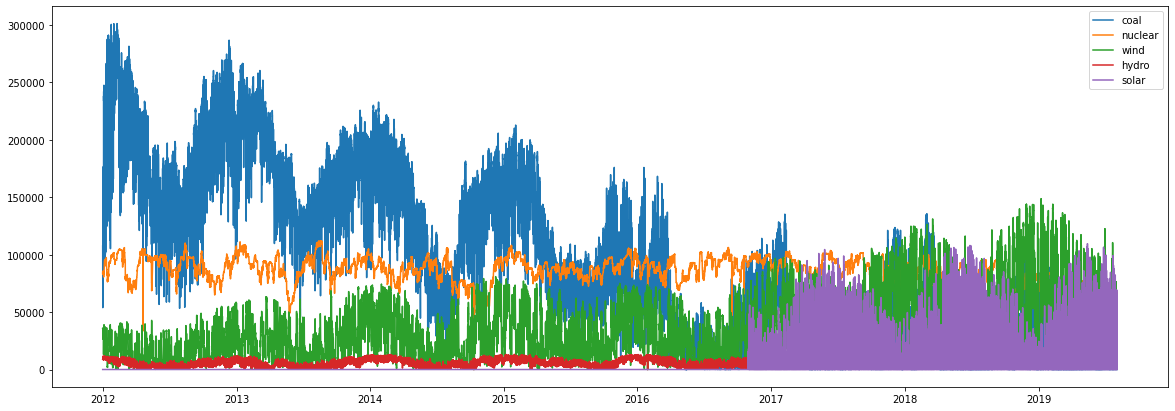

In [72]:
df = df.drop_duplicates().reset_index(drop=True)

df["timestamp"] = df["timestamp"].map(lambda x: datetime(x.year, x.month, x.day, x.hour, 0, 0))

df = df.groupby([date_col], axis=0, as_index=False).mean()
df["coal"] = df["coal"] * 12
df["nuclear"] = df["nuclear"] * 12
df["wind"] = df["wind"] * 12
df["hydro"] = df["hydro"] * 12
df["solar"] = df["solar"] * 12

print("shape:", df.shape)
display(df.head())

plt.figure(figsize=(20,7))
for col in df.columns[1:]:
    plt.plot(df["timestamp"], df[col], label=col)
plt.legend()
plt.show()

find missing hours

In [73]:
tmp = df.copy()

tmp["timestamp"] = tmp["timestamp"].map(lambda x: datetime(x.year, x.month, x.day, 0, 0, 0))
# 2012-01-01

ret = tmp.groupby([date_col], axis=0, as_index=False).count()
print("nb days with x values:")
print(ret['coal'].value_counts())

first_date = df["timestamp"][0]
last_date = df["timestamp"][df.shape[0] - 1]
print("nb days expected:", (last_date - first_date).days + 1)
print("nb days actual:", ret.shape[0])

nb days with x values:
24    2752
23       5
21       5
16       4
14       2
19       1
22       1
20       1
18       1
Name: coal, dtype: int64
nb days expected: 2772
nb days actual: 2772


In [74]:
# dates = missing hours
dates = ret[ret["coal"] != 24]["timestamp"].values
dates

array(['2012-11-28T00:00:00.000000000', '2013-02-02T00:00:00.000000000',
       '2013-04-03T00:00:00.000000000', '2013-07-13T00:00:00.000000000',
       '2013-07-14T00:00:00.000000000', '2014-03-26T00:00:00.000000000',
       '2014-07-25T00:00:00.000000000', '2014-11-19T00:00:00.000000000',
       '2014-12-08T00:00:00.000000000', '2015-07-22T00:00:00.000000000',
       '2015-07-23T00:00:00.000000000', '2016-01-20T00:00:00.000000000',
       '2016-01-21T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2016-09-13T00:00:00.000000000', '2016-09-26T00:00:00.000000000',
       '2017-01-21T00:00:00.000000000', '2018-03-06T00:00:00.000000000',
       '2018-11-22T00:00:00.000000000', '2019-08-03T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [75]:
df["timestamp_day"] = df["timestamp"].map(lambda x: datetime(x.year, x.month, x.day, 0, 0, 0))
df["original_data"] = True

In [76]:
# append NaN row for each missing date

data = {
  "timestamp": []
}

for date in dates:
  date = pd.to_datetime(date)
  tmp = df[df["timestamp_day"] == date]
  # display(tmp)
  for hour in range(0, 24):
    if not np.any(tmp["timestamp"].dt.hour == hour):
      data["timestamp"].append(datetime(date.year, date.month, date.day, hour, 0, 0))
      # print(hour)


data["original_data"] = False

df = df.append(pd.DataFrame(data=data))
df = df.sort_values(by="timestamp" ).reset_index(drop=True)

display(df)

,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
0,2012-01-01 00:00:00,107545.0,84685.0,35915.0,8971.0,0.0,2012-01-01,True
1,2012-01-01 01:00:00,103154.0,83313.0,35674.0,9108.0,0.0,2012-01-01,True
2,2012-01-01 02:00:00,92415.0,83339.0,35211.0,8977.0,0.0,2012-01-01,True
3,2012-01-01 03:00:00,74389.0,83337.0,35654.0,8952.0,0.0,2012-01-01,True
4,2012-01-01 04:00:00,64333.0,84255.0,36024.0,8940.0,0.0,2012-01-01,True
...,...,...,...,...,...,...,...,...
66523,2019-08-03 19:00:00,0.0,66247.0,8012.0,5001.0,3632.0,2019-08-03,True
66524,2019-08-03 20:00:00,0.0,64568.0,8320.0,4672.0,600.0,2019-08-03,True
66525,2019-08-03 21:00:00,NaN,NaN,NaN,NaN,NaN,NaT,False
66526,2019-08-03 22:00:00,NaN,NaN,NaN,NaN,NaN,NaT,False


In [77]:
# check if we have 24 values / day

tmp = df.copy()
tmp = tmp.fillna(-1)
display(tmp.tail())

date_col = "timestamp"


tmp["timestamp"] = tmp["timestamp"].map(lambda x: datetime(x.year, x.month, x.day, 0, 0, 0))

ret = tmp.groupby([date_col], axis=0, as_index=False).count()
print("nb days with x values:")
print(ret['coal'].value_counts())

first_date = df["timestamp"][0]
last_date = df["timestamp"][df.shape[0] - 1]
print("nb days expected:", (last_date - first_date).days + 1)
print("nb days actual:", ret.shape[0])

,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
66523,2019-08-03 19:00:00,0.0,66247.0,8012.0,5001.0,3632.0,2019-08-03 00:00:00,True
66524,2019-08-03 20:00:00,0.0,64568.0,8320.0,4672.0,600.0,2019-08-03 00:00:00,True
66525,2019-08-03 21:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1,False
66526,2019-08-03 22:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1,False
66527,2019-08-03 23:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1,False


nb days with x values:
24    2772
Name: coal, dtype: int64
nb days expected: 2772
nb days actual: 2772


In [78]:
# interpolate (fill) new rows
for col in df.columns[1:-2]:
  print(col)
  df[col] = df[col].interpolate()

coal
nuclear
wind
hydro
solar


In [79]:
df.drop("timestamp_day", axis=1, inplace=True)

,timestamp,coal,nuclear,wind,hydro,solar,original_data
0,2012-01-01 00:00:00,107545.0,84685.0,35915.0,8971.0,0.0,True
1,2012-01-01 01:00:00,103154.0,83313.0,35674.0,9108.0,0.0,True
2,2012-01-01 02:00:00,92415.0,83339.0,35211.0,8977.0,0.0,True
3,2012-01-01 03:00:00,74389.0,83337.0,35654.0,8952.0,0.0,True
4,2012-01-01 04:00:00,64333.0,84255.0,36024.0,8940.0,0.0,True
...,...,...,...,...,...,...,...
66523,2019-08-03 19:00:00,0.0,66247.0,8012.0,5001.0,3632.0,True
66524,2019-08-03 20:00:00,0.0,64568.0,8320.0,4672.0,600.0,True
66525,2019-08-03 21:00:00,0.0,64568.0,8320.0,4672.0,600.0,False
66526,2019-08-03 22:00:00,0.0,64568.0,8320.0,4672.0,600.0,False


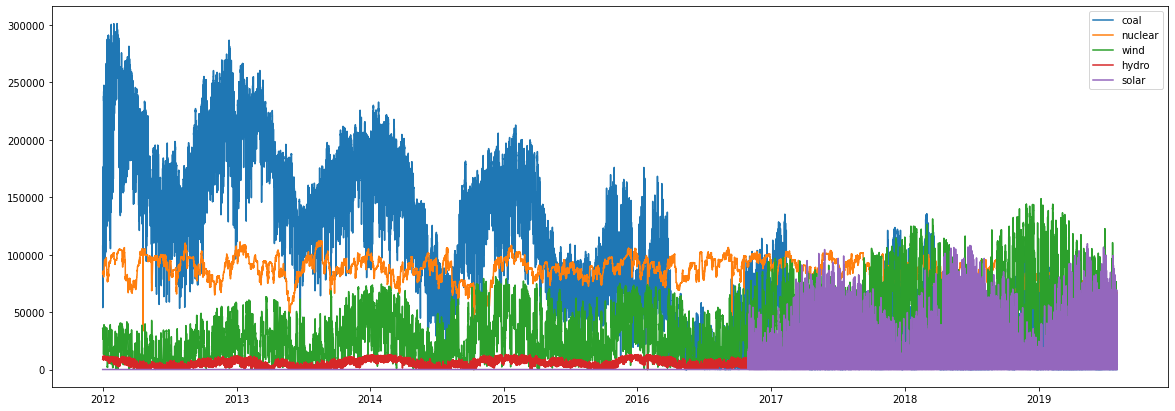

In [80]:
display(df)
plt.figure(figsize=(20,7))
for col in df.columns[1:-1]:
    plt.plot(df["timestamp"], df[col], label=col)
plt.legend()
plt.show()

In [81]:
df.to_csv("mean_energy_use_by_hour.csv", index=False)

## i) groupby day dataframe (mean)

shape: (2772, 7)


,timestamp,coal,nuclear,wind,hydro,solar,original_data
0,2012-01-01,5.875980e+07,4.870889e+07,1.824931e+07,5.435616e+06,0.0,1.0
1,2012-01-02,7.063246e+07,4.890899e+07,1.909855e+07,5.380041e+06,0.0,1.0
2,2012-01-03,1.063410e+08,4.814033e+07,1.492598e+07,5.558952e+06,0.0,1.0
3,2012-01-04,1.176899e+08,4.893631e+07,1.834577e+07,5.573304e+06,0.0,1.0
4,2012-01-05,1.143608e+08,5.212195e+07,1.824434e+07,5.719224e+06,0.0,1.0


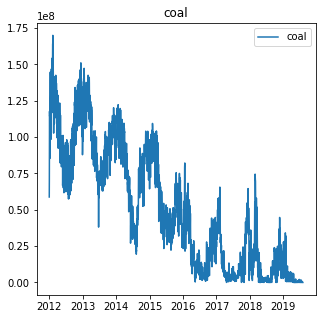

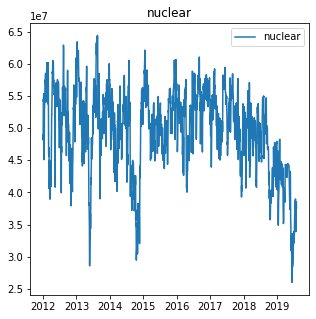

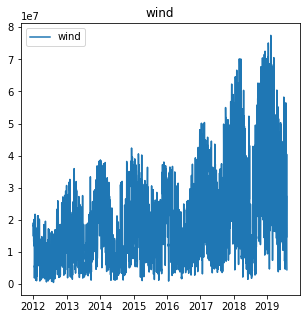

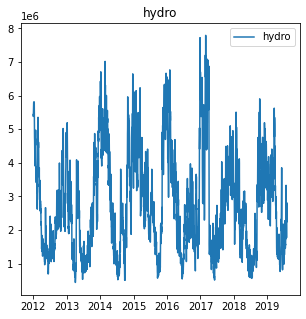

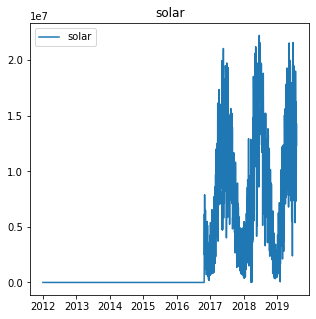

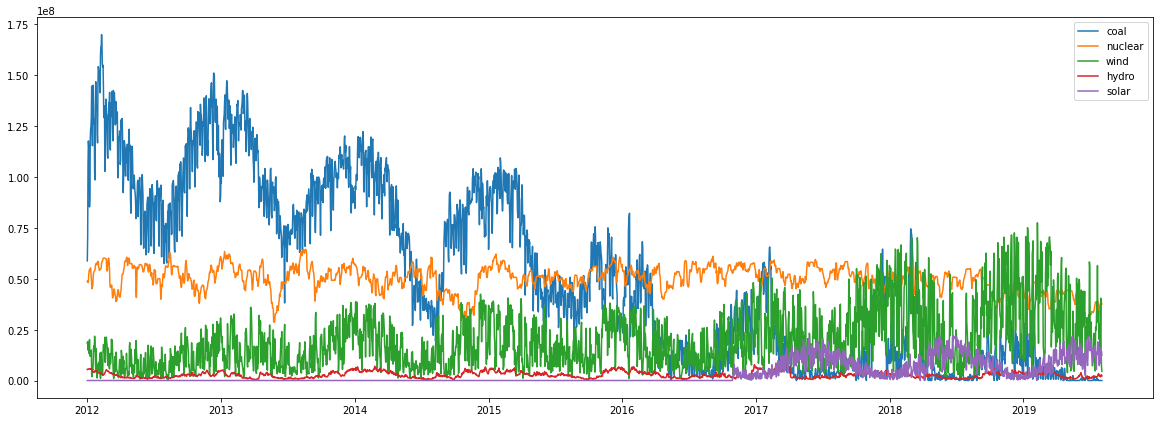

In [84]:
df["timestamp"] = df["timestamp"].map(lambda x: datetime(x.year, x.month, x.day, 0, 0, 0))

df = df.groupby([date_col], axis=0, as_index=False).mean()
df["coal"] = df["coal"] * 24
df["nuclear"] = df["nuclear"] * 24
df["wind"] = df["wind"] * 24
df["hydro"] = df["hydro"] * 24
df["solar"] = df["solar"] * 24

print("shape:", df.shape)
display(df.head())

for col in df.columns[1:-1]:
  plt.figure(figsize=(5,5))
  plt.title(col)
  plt.plot(df["timestamp"], df[col], label=col)
  plt.legend()
  plt.show()
  
plt.figure(figsize=(20,7))
for col in df.columns[1:-1]:
    plt.plot(df["timestamp"], df[col], label=col)
plt.legend()
plt.show()

In [83]:
df.to_csv("mean_energy_use_by_day.csv", index=False)

# II. LSTM pred nuclear

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [160]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.optimizers import Adam

import keras
from keras.utils.vis_utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, LSTM, Conv1D, GlobalMaxPooling1D, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

from tqdm.keras import TqdmCallback

import os
from tqdm import tqdm

## a) read csv

In [244]:
col = "hydro"

df = pd.read_csv("mean_energy_use_by_day.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
print(df.shape)
display(df.head())
df.info()

(2772, 7)


,timestamp,coal,nuclear,wind,hydro,solar,original_data
0,2012-01-01,2.448325e+06,2.029537e+06,760388.000000,226484.000000,0.0,1.0
1,2012-01-02,2.943019e+06,2.037875e+06,795772.727273,224168.363636,0.0,1.0
2,2012-01-03,4.430877e+06,2.005847e+06,621916.000000,231623.000000,0.0,1.0
3,2012-01-04,4.903744e+06,2.039013e+06,764407.000000,232221.000000,0.0,1.0
4,2012-01-05,4.765032e+06,2.171748e+06,760181.000000,238301.000000,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      2772 non-null   datetime64[ns]
 1   coal           2772 non-null   float64       
 2   nuclear        2772 non-null   float64       
 3   wind           2772 non-null   float64       
 4   hydro          2772 non-null   float64       
 5   solar          2772 non-null   float64       
 6   original_data  2772 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 151.7 KB


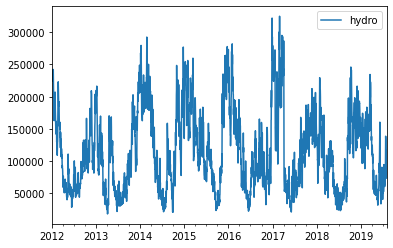

,hydro
2012-01-01,226484.000000
2012-01-02,224168.363636
2012-01-03,231623.000000
2012-01-04,232221.000000
2012-01-05,238301.000000


In [245]:
df = df[["timestamp", col]]
df.set_index(df["timestamp"].values, drop=True, inplace=True)
df.drop("timestamp", axis=1, inplace=True)
df.plot()
plt.show()
df.head()

In [246]:
scaler = MinMaxScaler()
scaler.fit(df)
df[col] = scaler.transform(df)
df

,hydro
2012-01-01,0.679447
2012-01-02,0.671894
2012-01-03,0.696211
2012-01-04,0.698161
2012-01-05,0.717994
...,...
2019-07-30,0.180866
2019-07-31,0.243848
2019-08-01,0.322719
2019-08-02,0.316880


In [247]:
max(df[col]), min(df[col])

(1.0, 0.0)

In [248]:
train_split_percent = 0.80

train_split_percent = int(df.shape[0] * train_split_percent)
train = df.iloc[:train_split_percent].to_numpy()
test = df.iloc[train_split_percent:].to_numpy()

train.shape, test.shape

((2217, 1), (555, 1))

In [249]:
input_length = 12
features_length = 1
generator = TimeseriesGenerator(train, train, length=input_length, batch_size=1)

## c) build model

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


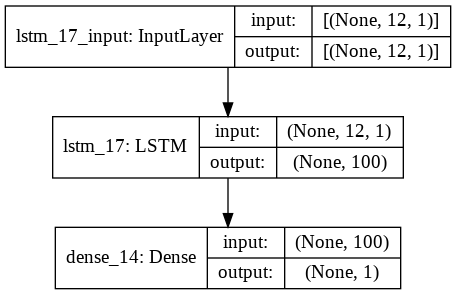

In [250]:
# inputs = Input(shape=(input_length, features_length))

# main = LSTM(50, activation="relu", return_sequences=True)(inputs)
# main = LSTM(50, activation="relu")(inputs)
# main = Dense(1, activation=None, name='output')(main)

# model = Model(inputs, main)

# model.compile(
#   optimizer = Adam(learning_rate=0.01),
#   loss = "mse"
# )

model = Sequential()
model.add(LSTM(100, activation="relu", input_shape=(input_length, features_length)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="rmse")

model.summary()
plot_model(model, to_file="blbl.png", show_shapes=True)

## d) train model

In [251]:
epochs = 10

# train model
history = model.fit(
      generator,
      epochs=epochs,
      verbose=0,
      callbacks=[TqdmCallback(verbose=2), EarlyStopping(monitor='loss', patience=3)]
  )

# save model
if not os.path.isdir("model"):
  os.system("mkdir model")
model.save("model/model.h5")

0epoch [00:00, ?epoch/s]

  0%|          | 0.00/2.21k [00:00<?, ?batch/s]

ValueError: ignored

In [ ]:
# show loss
loss_per_epoch = model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.show()

In [ ]:
# start = 0

# predictions = [np.nan] * (start + input_length)
# current_batch = df["wind"][start:input_length].values

# # for index in tqdm(range(start, df.shape[0] - input_length)):
# for index in range(start, df.shape[0] - input_length):
#   print("current_batch:", current_batch)
#   current_batch_3_dim = current_batch.reshape((1, input_length, features_length))
#   current_prediction = model.predict(current_batch_3_dim)[0][0]
#   print("current_prediction:", current_prediction)
#   predictions.append(current_prediction)
#   current_batch = np.append(current_batch[1:], current_prediction)
#   # current_batch = np.append(current_batch[:, 1:, :], [[[current_prediction]]], axis=1)
#   if index == 100:
#     break

# # predictions = scaler.inverse_transform(np.array([predictions]))

# df["prediction"] = predictions
# display(df.head())
# display(df.tail())
# display(df.info())
# df.plot(figsize=(14,5))

In [ ]:
test_predictions = []
first_batch_for_prediction = scaled_train[-input_length :]
current_batch = first_batch_for_prediction.reshape((1, input_length, features_length))

for index in range(len(test)):
  current_prediction = model.predict(current_batch)[0]
  test_predictions.append(current_prediction)
  current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

# III. Pred II le retour

In [291]:
from tensorflow.keras.optimizers import RMSprop

In [292]:
col = "hydro"

df = pd.read_csv("mean_energy_use_by_day.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
print(df.shape)
display(df.head())
df.info()

(2772, 7)


,timestamp,coal,nuclear,wind,hydro,solar,original_data
0,2012-01-01,2.448325e+06,2.029537e+06,760388.000000,226484.000000,0.0,1.0
1,2012-01-02,2.943019e+06,2.037875e+06,795772.727273,224168.363636,0.0,1.0
2,2012-01-03,4.430877e+06,2.005847e+06,621916.000000,231623.000000,0.0,1.0
3,2012-01-04,4.903744e+06,2.039013e+06,764407.000000,232221.000000,0.0,1.0
4,2012-01-05,4.765032e+06,2.171748e+06,760181.000000,238301.000000,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      2772 non-null   datetime64[ns]
 1   coal           2772 non-null   float64       
 2   nuclear        2772 non-null   float64       
 3   wind           2772 non-null   float64       
 4   hydro          2772 non-null   float64       
 5   solar          2772 non-null   float64       
 6   original_data  2772 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 151.7 KB


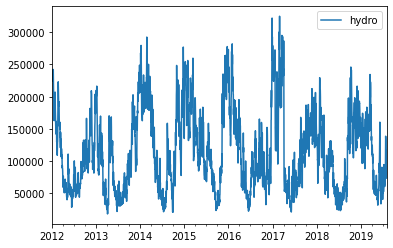

,hydro
2012-01-01,226484.000000
2012-01-02,224168.363636
2012-01-03,231623.000000
2012-01-04,232221.000000
2012-01-05,238301.000000


In [293]:
df = df[["timestamp", col]]
df.set_index(df["timestamp"].values, drop=True, inplace=True)
df.drop("timestamp", axis=1, inplace=True)
df.plot()
plt.show()
df.head()

In [294]:
# Divide data into train and test sets
train_split_percent = 0.80

train_split_percent = int(df.shape[0] * train_split_percent)

train = df.iloc[:train_split_percent]
test = df.iloc[train_split_percent:]

In [295]:
# Normalize training data
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)
 
# Create supervised data with 12 inputs and 1 output
n_lag = 100
X_train = []
y_train = []
for i in range(n_lag, len(train)):
    X_train.append(train_scaled[i-n_lag:i, 0])
    y_train.append(train_scaled[i, 0])
 
X_train, y_train = np.array(X_train), np.array(y_train)
 
# Reshape train set
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [296]:
model = Sequential()
# model.add(LSTM(units=n_lag, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=n_lag, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
# opt = RMSprop(learning_rate=0.0001)
# model.compile(optimizer = opt, loss = 'mae')
model.compile(optimizer="adam", loss="mse")
 
# Fit LSTM to the training set with a split for validation
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

Epoch 1/200
53/53 [==============================] - 4s 36ms/step - loss: 0.0188 - val_loss: 0.0145
Epoch 2/200
53/53 [==============================] - 1s 25ms/step - loss: 0.0070 - val_loss: 0.0130
Epoch 3/200
53/53 [==============================] - 1s 26ms/step - loss: 0.0062 - val_loss: 0.0115
Epoch 4/200
53/53 [==============================] - 1s 26ms/step - loss: 0.0056 - val_loss: 0.0102
Epoch 5/200
53/53 [==============================] - 1s 26ms/step - loss: 0.0050 - val_loss: 0.0093
Epoch 6/200
53/53 [==============================] - 1s 26ms/step - loss: 0.0047 - val_loss: 0.0085
Epoch 7/200
53/53 [==============================] - 1s 26ms/step - loss: 0.0042 - val_loss: 0.0079
Epoch 8/200
53/53 [==============================] - 1s 26ms/step - loss: 0.0040 - val_loss: 0.0074
Epoch 9/200
53/53 [==============================] - 1s 26ms/step - loss: 0.0038 - val_loss: 0.0072
Epoch 10/200
53/53 [==============================] - 1s 25ms/step - loss: 0.0037 - val_loss: 0.0069

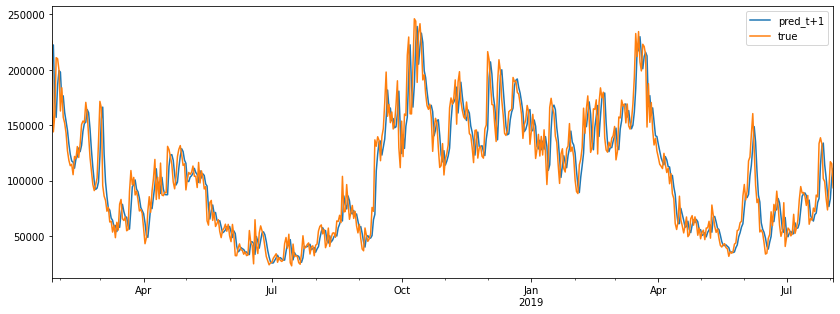

In [297]:
inputs = df[len(df) - len(test) - n_lag:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(n_lag, n_lag+len(test)):
    X_test.append(inputs[i-n_lag:i, 0])
     
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
 
# Forecast
predict_scaled = regressor.predict(X_test)
predict = sc.inverse_transform(predict_scaled)
 
predict = pd.DataFrame(predict)
predict.columns = ['pred_t+1']
predict.index = test.index
predict["true"] = test.values

predict.plot(figsize=(14,5))

100%|██████████| 555/555 [00:28<00:00, 19.67it/s]


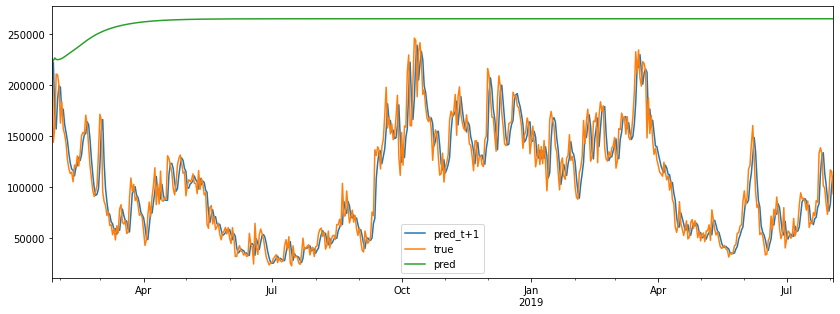

In [299]:
test_predictions = []
first_batch_for_prediction = train_scaled[-n_lag :]
current_batch = first_batch_for_prediction.reshape((1, n_lag, features_length))

for index in tqdm(range(len(test))):
  current_prediction = model.predict(current_batch)[0]
  test_predictions.append(current_prediction)
  current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

test_predictions_unnormalized = sc.inverse_transform(test_predictions)

predict["pred"] = test_predictions_unnormalized
predict.plot(figsize=(14,5))